# Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [2]:
#pip install catboost

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

In [5]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
df = pd.read_csv("/Users/mounikapeddareddyvari/Downloads/Heart_Disease_Prediction.csv")
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


## Preprocessing Data

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
# Checking for missing values.
df.isnull().values.any()

False

## Data Analysis

In [9]:
df.shape

(270, 14)

In [10]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [11]:
# Imbalanced data based on outcome.
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

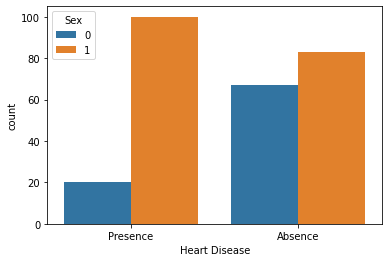

In [12]:
sns.countplot(x=df['Heart Disease'],hue='Sex',data=df)

<AxesSubplot:xlabel='Heart Disease', ylabel='BP'>

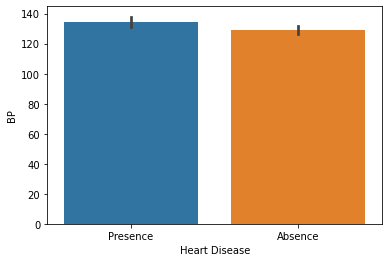

In [13]:
sns.barplot(x=df['Heart Disease'],y=df['BP'],data=df)

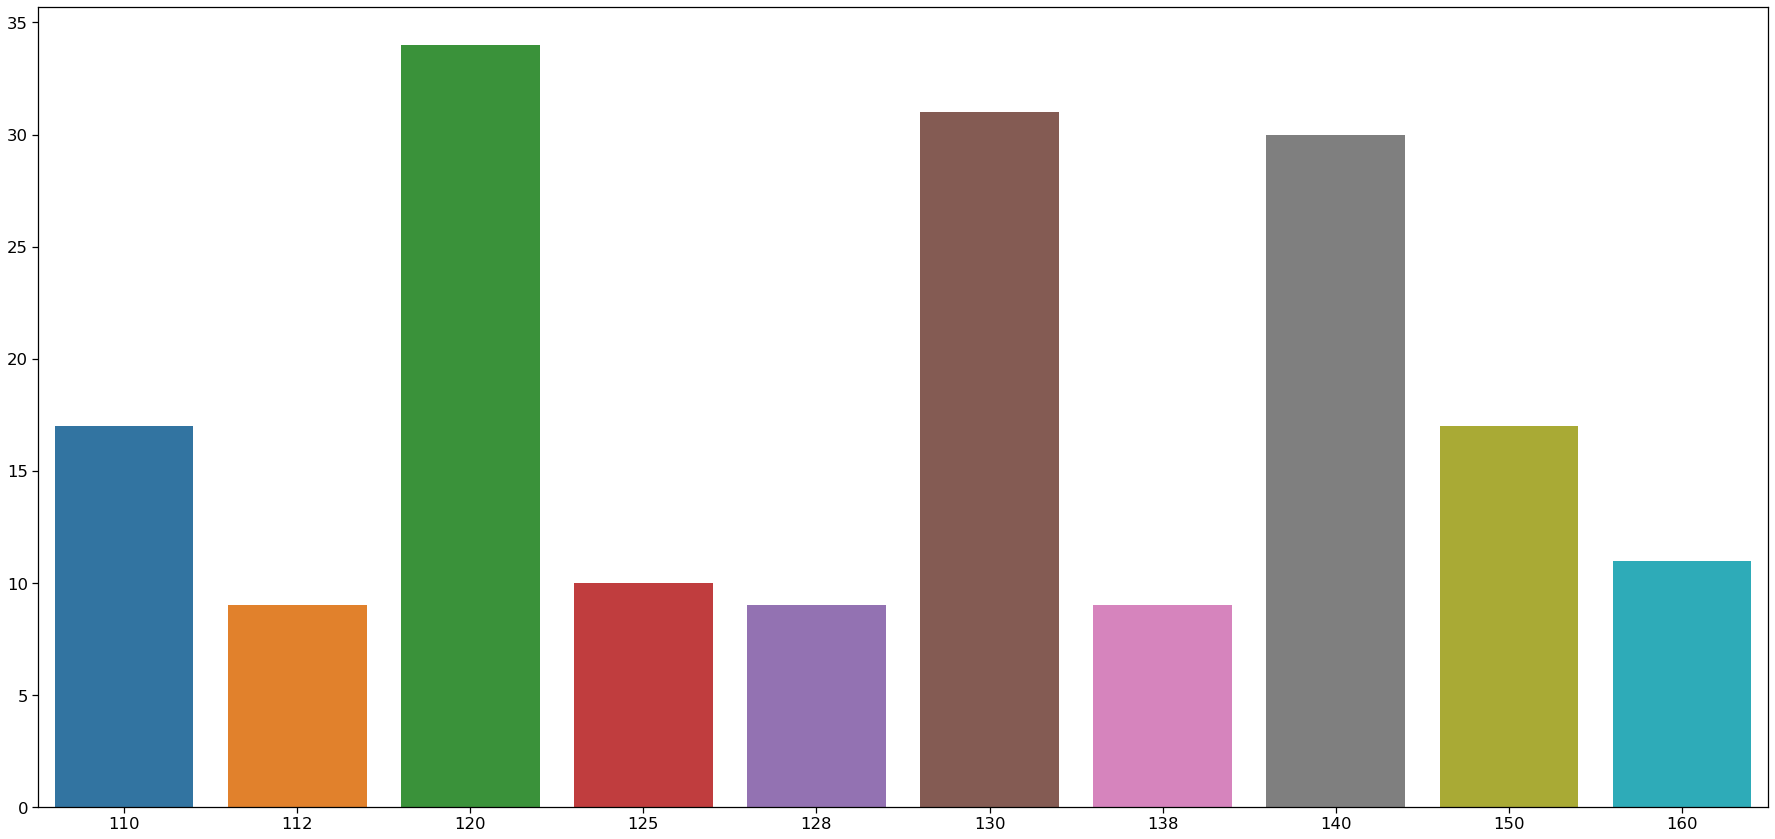

In [14]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.BP.value_counts()[:10].index,y=df.BP.value_counts()[:10].values)
plt.tight_layout()

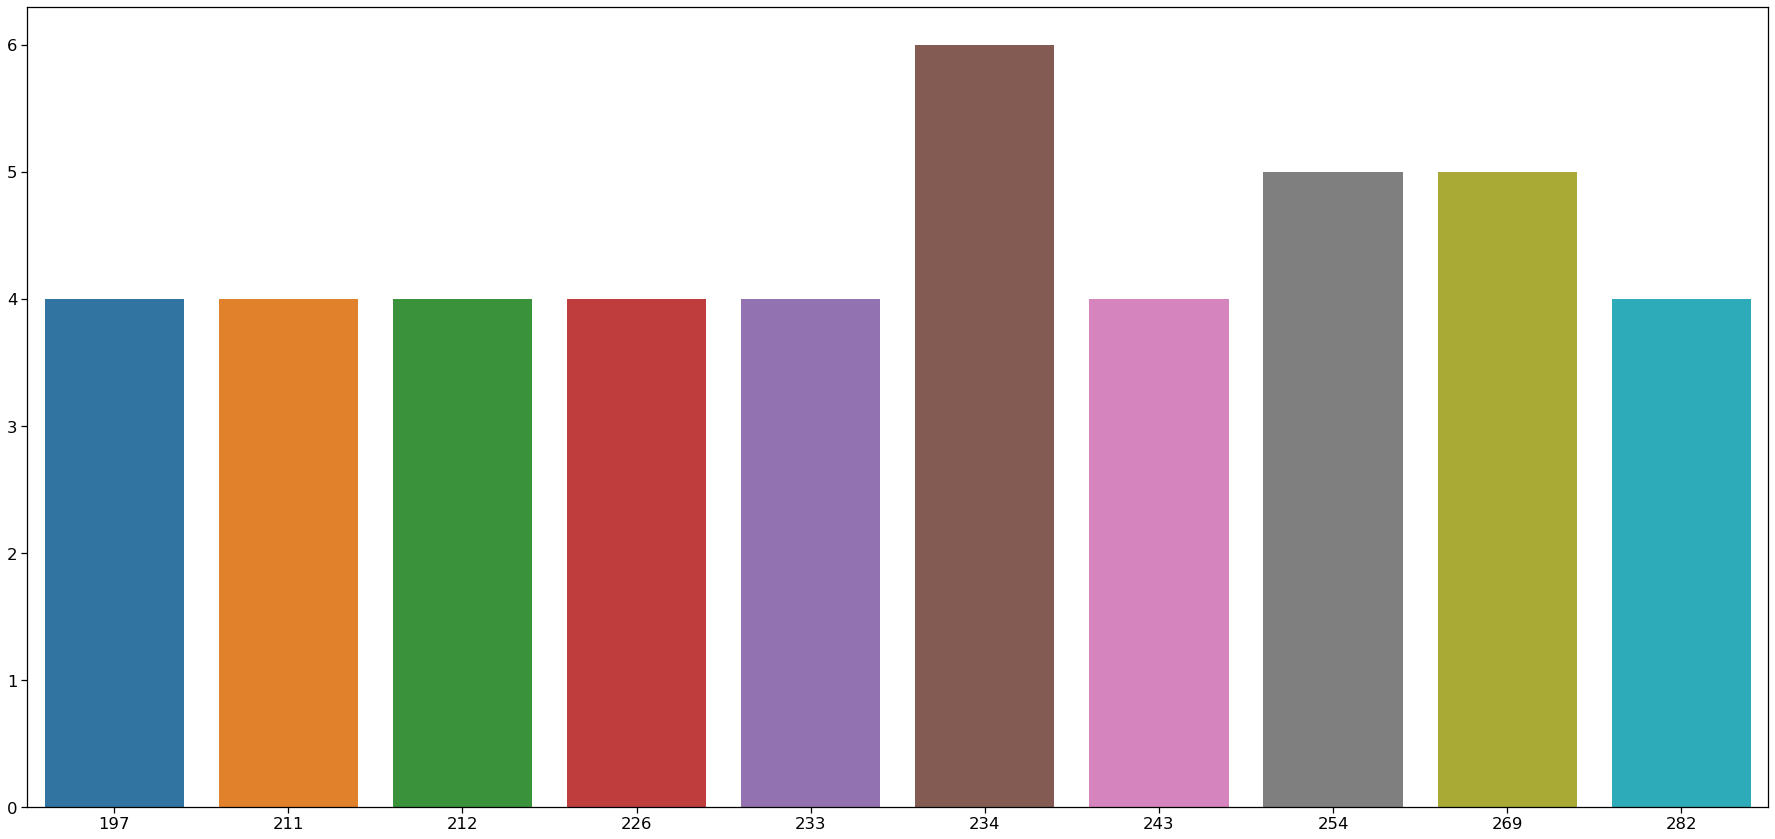

In [15]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.Cholesterol.value_counts()[:10].index,y=df.Cholesterol.value_counts()[:10].values)
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='ST depression'>

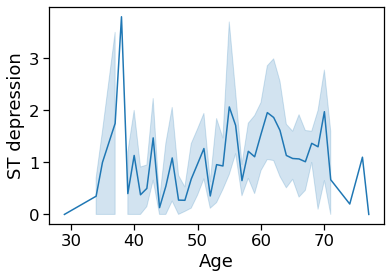

In [16]:
sns.lineplot(x=df['Age'],y=df['ST depression'],data=df)

In [17]:
# Correlation between parameters
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


<AxesSubplot:>

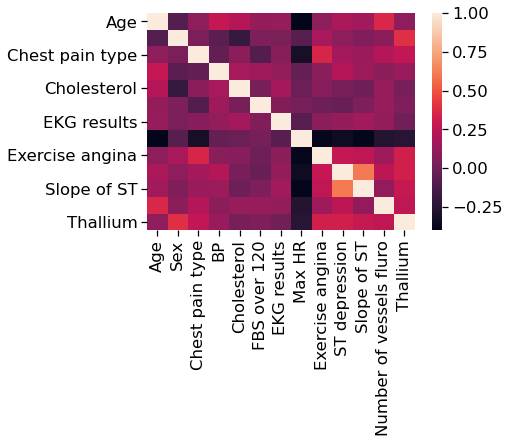

In [18]:
sns.heatmap(df.corr())

## Feature Engineering

In [19]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
Age : [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
--------------------
Sex : [1 0]
--------------------
Chest pain type : [4 3 2 1]
--------------------
BP : [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
--------------------
Cholesterol : [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227 220 168
 

In [20]:
df1 = pd.get_dummies(df, columns = categorical_val)
df1.head(10)

,Age,BP,Cholesterol,Max HR,ST depression,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7,Heart Disease_Absence,Heart Disease_Presence
0,70,130,322,109,2.4,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,67,115,564,160,1.6,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
2,57,124,261,141,0.3,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,64,128,263,105,0.2,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,74,120,269,121,0.2,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5,65,120,177,140,0.4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6,56,130,256,142,0.6,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
7,59,110,239,142,1.2,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8,60,140,293,170,1.2,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
9,63,150,407,154,4.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [21]:
ss = StandardScaler()
col_to_scale = ['Age', 'BP', 'Max HR', 'Cholesterol', 'ST depression']
df1[col_to_scale] = ss.fit_transform(df1[col_to_scale])
df1.head(10)

,Age,BP,Cholesterol,Max HR,ST depression,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7,Heart Disease_Absence,Heart Disease_Presence
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1.382140,-0.916759,6.093004,0.446409,0.481153,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5,1.162171,-0.636310,-1.408386,-0.418539,-0.568636,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6,0.172309,-0.075410,0.122905,-0.332044,-0.393671,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
7,0.502263,-1.197209,-0.206613,-0.332044,0.131224,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8,0.612248,0.485490,0.840093,0.878883,0.131224,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
9,0.942201,1.046389,3.049805,0.186925,2.580731,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


## k-Nearest Neighbours

In [22]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.35)

In [23]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [24]:
import math
math.sqrt(len(y_test))

9.746794344808963

In [25]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [26]:
y_pred = classifier.predict(x_test)
y_pred

array(['Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       '

In [27]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[49  7]
 [14 25]]


In [28]:
print(accuracy_score(y_test,y_pred))

0.7789473684210526


## Logistic Regression

In [29]:
logr=LogisticRegression(max_iter=10000)
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)

In [30]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[49  7]
 [13 26]]


In [31]:
print(accuracy_score(y_test,y_pred))

0.7894736842105263


## SVM Model

In [32]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [33]:
y_pred = clf.predict(x_test)
y_pred

array(['Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', '

In [34]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[50  6]
 [13 26]]


In [35]:
print(accuracy_score(y_test,y_pred))

0.8
